In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np



In [15]:
rainfall = pd.read_csv('./venv/rainfall.csv')

In [16]:
rainfall.head()

,Dist Code,Year,State Code,State Name,Dist Name,ANNUAL RAINFALL (Millimeters)
0,72,1990,5,Karnataka,Chitradurga,492.0
1,72,1991,5,Karnataka,Chitradurga,706.0
2,72,1992,5,Karnataka,Chitradurga,700.0
3,72,1993,5,Karnataka,Chitradurga,557.0
4,72,1994,5,Karnataka,Chitradurga,504.4


In [17]:

# Group by the 'Year' column and calculate the mean of 'ANNUAL RAINFALL (Millimeters)'
average_rainfall_per_year = rainfall.groupby('Year')['ANNUAL RAINFALL (Millimeters)'].mean()


In [18]:
rainfall_average = pd.DataFrame(average_rainfall_per_year).reset_index()
rainfall_average.head()

,Year,ANNUAL RAINFALL (Millimeters)
0,1990,568.00
1,1991,671.50
2,1992,656.50
3,1993,630.50
4,1994,470.95


In [19]:
crops = pd.read_csv('./venv/crops.csv')
crops.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),SORGHUM AREA (1000 ha),SORGHUM PRODUCTION (1000 tons),...,FINGER MILLET YIELD (Kg per ha),CHICKPEA AREA (1000 ha),CHICKPEA PRODUCTION (1000 tons),CHICKPEA YIELD (Kg per ha),PIGEONPEA AREA (1000 ha),PIGEONPEA PRODUCTION (1000 tons),PIGEONPEA YIELD (Kg per ha),GROUNDNUT AREA (1000 ha),GROUNDNUT PRODUCTION (1000 tons),GROUNDNUT YIELD (Kg per ha)
0,72,1990,5,Karnataka,Chitradurga,58.61,177.23,3024.0,89.12,78.94,...,775.0,2.82,0.49,174.0,12.22,5.81,475.0,141.98,79.15,557.0
1,72,1991,5,Karnataka,Chitradurga,41.09,105.15,2559.0,83.39,120.91,...,1221.0,3.45,1.02,296.0,11.63,8.69,747.0,161.35,146.35,907.0
2,72,1992,5,Karnataka,Chitradurga,71.19,212.51,2985.0,81.67,99.29,...,1282.0,3.27,1.20,367.0,13.82,9.53,690.0,189.60,206.83,1091.0
3,72,1993,5,Karnataka,Chitradurga,75.54,220.67,2921.0,77.01,105.97,...,1274.0,2.78,0.88,317.0,10.75,6.23,580.0,198.37,171.04,862.0
4,72,1994,5,Karnataka,Chitradurga,73.94,230.25,3114.0,66.24,82.68,...,1273.0,3.00,1.98,660.0,11.04,3.97,360.0,170.81,125.33,734.0


In [23]:
# List of crops
crops_list = ['RICE', 'SORGHUM', 'MAIZE', 'FINGER MILLET', 'CHICKPEA', 'PIGEONPEA', 'GROUNDNUT']

# Initialize an empty DataFrame
crops_data = pd.DataFrame()

In [24]:
# For each crop, calculate the sum of AREA, PRODUCTION, and YIELD for each year
for crop in crops_list:
    temp_df = crops.groupby('Year')[[f'{crop} AREA (1000 ha)',
                                      f'{crop} PRODUCTION (1000 tons)',
                                      f'{crop} YIELD (Kg per ha)']].sum()
    temp_df = temp_df.add_prefix(f'')
    if crops_data.empty:
        crops_data = temp_df
    else:
        crops_data = crops_data.join(temp_df)


In [25]:
crops_data.head()

,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),SORGHUM AREA (1000 ha),SORGHUM PRODUCTION (1000 tons),SORGHUM YIELD (Kg per ha),MAIZE AREA (1000 ha),MAIZE PRODUCTION (1000 tons),MAIZE YIELD (Kg per ha),FINGER MILLET AREA (1000 ha),...,FINGER MILLET YIELD (Kg per ha),CHICKPEA AREA (1000 ha),CHICKPEA PRODUCTION (1000 tons),CHICKPEA YIELD (Kg per ha),PIGEONPEA AREA (1000 ha),PIGEONPEA PRODUCTION (1000 tons),PIGEONPEA YIELD (Kg per ha),GROUNDNUT AREA (1000 ha),GROUNDNUT PRODUCTION (1000 tons),GROUNDNUT YIELD (Kg per ha)
Year,,,,,,,,,,,,,,,,,,,,,
1990,101.00,301.35,5952.0,271.78,254.40,1847.0,47.25,126.91,5416.0,136.22,...,1328.0,11.42,2.65,425.0,28.57,11.46,821.0,222.84,145.55,1378.0
1991,83.19,215.30,5175.0,253.30,296.05,2481.0,63.77,207.26,6467.0,116.62,...,1944.0,8.96,2.98,652.0,26.32,18.57,1420.0,241.15,222.67,1863.0
1992,120.49,341.83,5608.0,267.56,261.53,2089.0,87.72,276.28,6160.0,106.49,...,2093.0,8.34,3.29,779.0,29.67,17.15,1171.0,274.86,276.33,1906.0
1993,129.03,361.84,5560.0,229.87,255.11,2352.0,69.48,221.21,6384.0,115.48,...,2330.0,7.82,2.92,722.0,24.47,12.85,1063.0,277.29,249.33,1854.0
1994,132.84,374.54,5564.0,196.51,197.26,2128.0,87.96,272.68,6184.0,103.32,...,2233.0,12.46,6.02,1087.0,23.54,11.72,980.0,259.08,199.83,1578.0


In [26]:
crops_df = pd.merge(crops_data, rainfall_average, on='Year')
crops_df.head()


,Year,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),SORGHUM AREA (1000 ha),SORGHUM PRODUCTION (1000 tons),SORGHUM YIELD (Kg per ha),MAIZE AREA (1000 ha),MAIZE PRODUCTION (1000 tons),MAIZE YIELD (Kg per ha),...,CHICKPEA AREA (1000 ha),CHICKPEA PRODUCTION (1000 tons),CHICKPEA YIELD (Kg per ha),PIGEONPEA AREA (1000 ha),PIGEONPEA PRODUCTION (1000 tons),PIGEONPEA YIELD (Kg per ha),GROUNDNUT AREA (1000 ha),GROUNDNUT PRODUCTION (1000 tons),GROUNDNUT YIELD (Kg per ha),ANNUAL RAINFALL (Millimeters)
0,1990,101.00,301.35,5952.0,271.78,254.40,1847.0,47.25,126.91,5416.0,...,11.42,2.65,425.0,28.57,11.46,821.0,222.84,145.55,1378.0,568.00
1,1991,83.19,215.30,5175.0,253.30,296.05,2481.0,63.77,207.26,6467.0,...,8.96,2.98,652.0,26.32,18.57,1420.0,241.15,222.67,1863.0,671.50
2,1992,120.49,341.83,5608.0,267.56,261.53,2089.0,87.72,276.28,6160.0,...,8.34,3.29,779.0,29.67,17.15,1171.0,274.86,276.33,1906.0,656.50
3,1993,129.03,361.84,5560.0,229.87,255.11,2352.0,69.48,221.21,6384.0,...,7.82,2.92,722.0,24.47,12.85,1063.0,277.29,249.33,1854.0,630.50
4,1994,132.84,374.54,5564.0,196.51,197.26,2128.0,87.96,272.68,6184.0,...,12.46,6.02,1087.0,23.54,11.72,980.0,259.08,199.83,1578.0,470.95


In [32]:
lookup_table = pd.DataFrame(columns=['Crop', 'Variable', 'Intercept', 'Slope'])


# For each crop, run a linear regression for AREA, PRODUCTION, and YIELD against rainfall
for crop in crops_list:
    for variable in ['AREA (1000 ha)', 'PRODUCTION (1000 tons)', 'YIELD (Kg per ha)']:
        X = crops_df[['ANNUAL RAINFALL (Millimeters)']]
        y = crops_df[f'{crop} {variable}']

        # Create a LinearRegression object
        reg = LinearRegression()

        # Fit the model
        reg.fit(X, y)

          # Create a DataFrame from the results
        result = pd.DataFrame([{
            'Crop': crop,
            'Variable': variable,
            'Intercept': reg.intercept_,
            'Slope': reg.coef_[0]
        }])

        # Concatenate the results DataFrame with the lookup table
        lookup_table = pd.concat([lookup_table, result], ignore_index=True)


        # Print the equations
        print(f"For {crop}, regression equation for {variable} against rainfall is:")
        print(f"{variable} = {reg.intercept_} + {reg.coef_[0]} * Rainfall")

For RICE, regression equation for AREA (1000 ha) against rainfall is:
AREA (1000 ha) = 101.42390741321472 + 0.20156310138392444 * Rainfall
For RICE, regression equation for PRODUCTION (1000 tons) against rainfall is:
PRODUCTION (1000 tons) = 223.61411610150992 + 0.765056663477175 * Rainfall
For RICE, regression equation for YIELD (Kg per ha) against rainfall is:
YIELD (Kg per ha) = 6703.193224031692 + 7.596719758109842 * Rainfall
For SORGHUM, regression equation for AREA (1000 ha) against rainfall is:
AREA (1000 ha) = 264.78718149422303 + -0.04618226699553281 * Rainfall
For SORGHUM, regression equation for PRODUCTION (1000 tons) against rainfall is:
PRODUCTION (1000 tons) = 141.93486696728309 + 0.17978673981339077 * Rainfall
For SORGHUM, regression equation for YIELD (Kg per ha) against rainfall is:
YIELD (Kg per ha) = 961.615602750147 + 6.220241868480164 * Rainfall
For MAIZE, regression equation for AREA (1000 ha) against rainfall is:
AREA (1000 ha) = 111.7882280427448 + 0.41062135417

In [33]:
lookup_table.head()


,Crop,Variable,Intercept,Slope
0,RICE,AREA (1000 ha),101.423907,0.201563
1,RICE,PRODUCTION (1000 tons),223.614116,0.765057
2,RICE,YIELD (Kg per ha),6703.193224,7.596720
3,SORGHUM,AREA (1000 ha),264.787181,-0.046182
4,SORGHUM,PRODUCTION (1000 tons),141.934867,0.179787


In [34]:
lookup_table.to_pickle('./venv/pickles/rainfall_crops_regression.pkl')

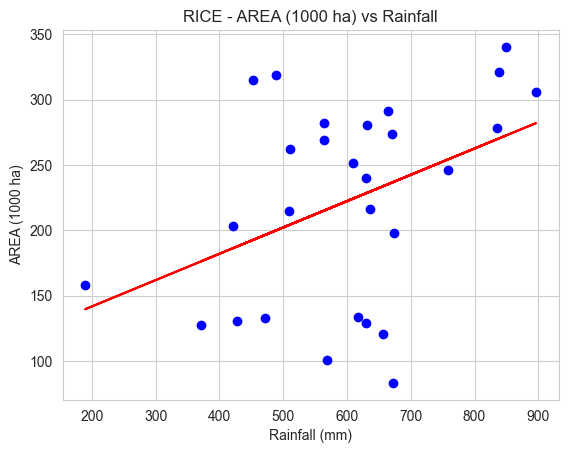

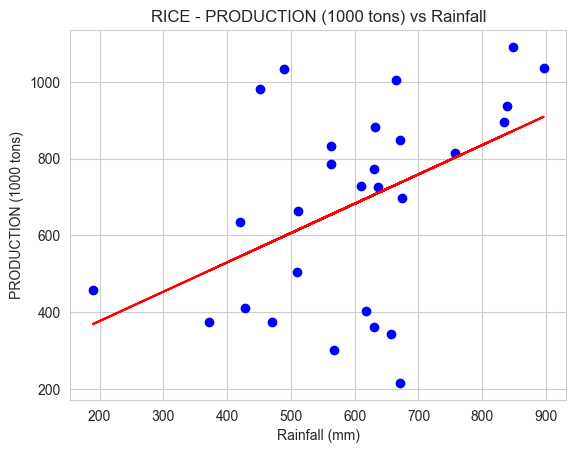

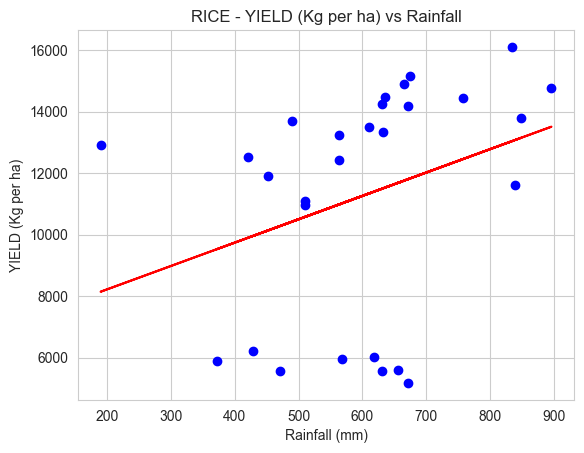

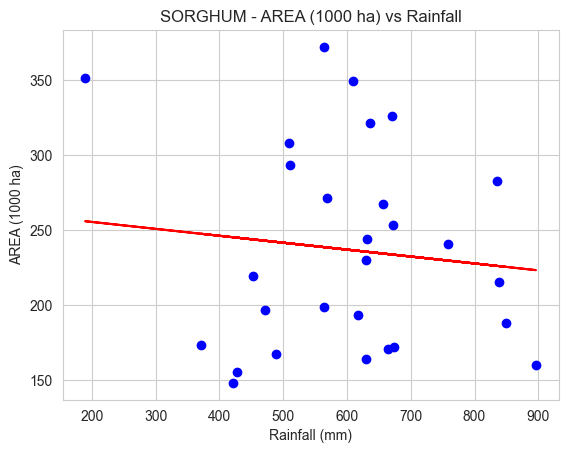

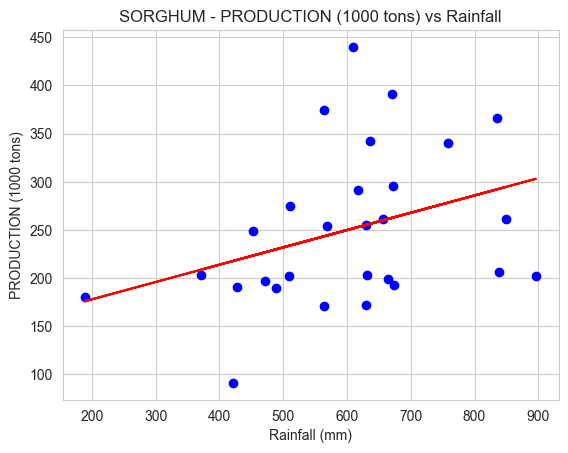

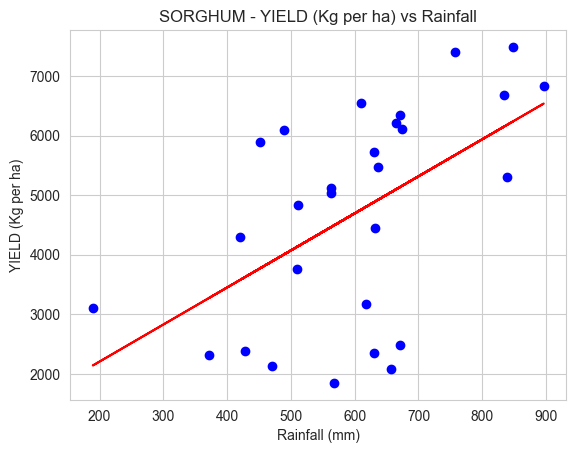

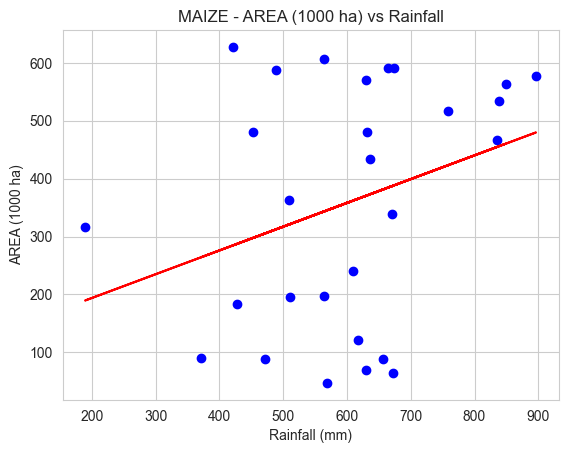

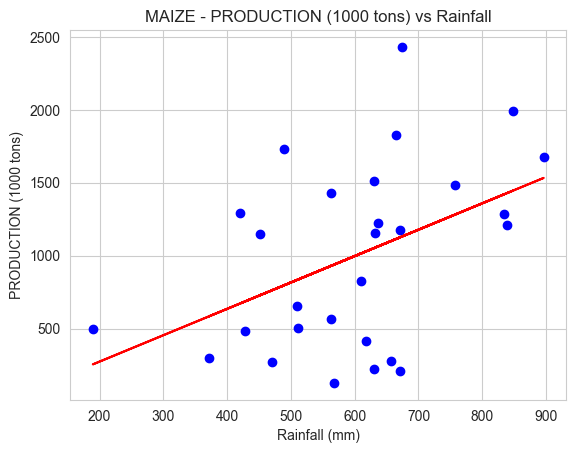

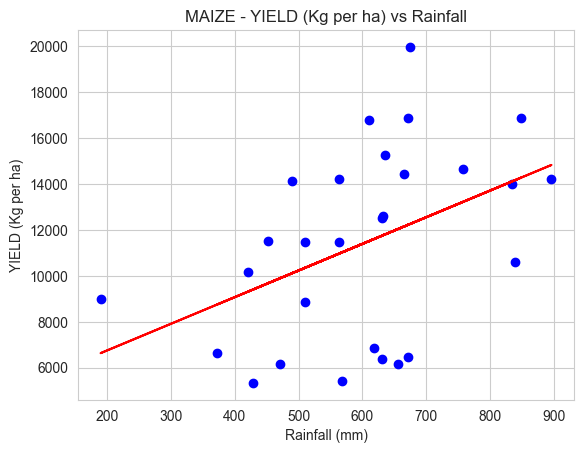

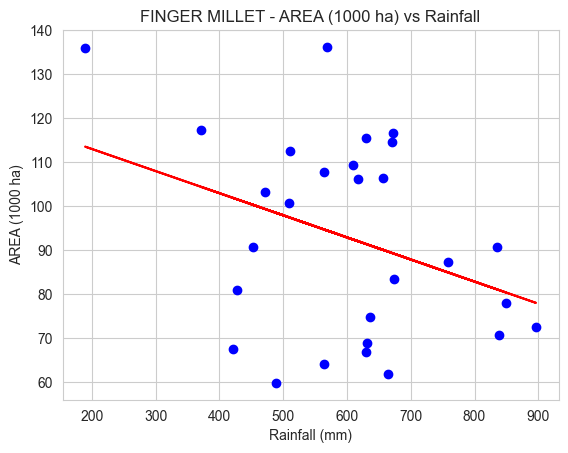

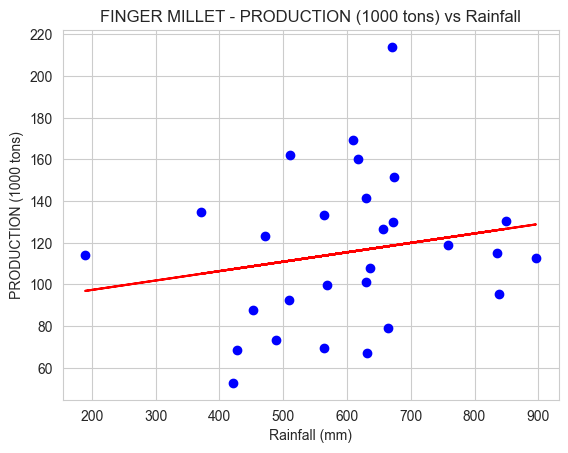

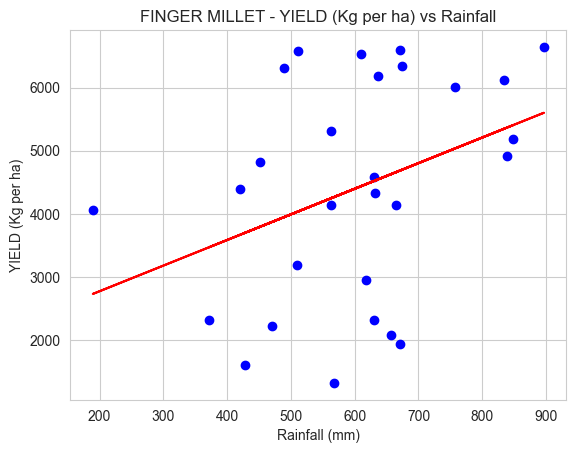

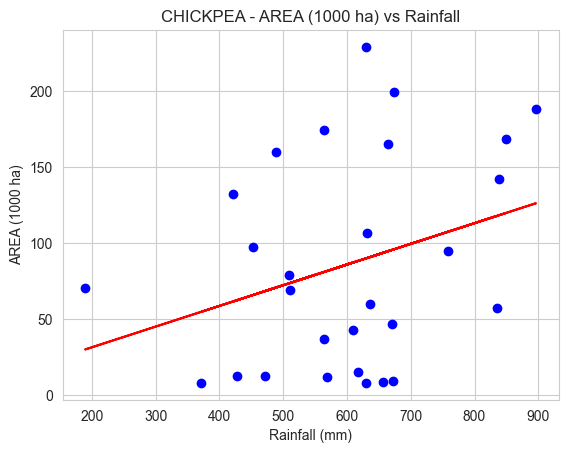

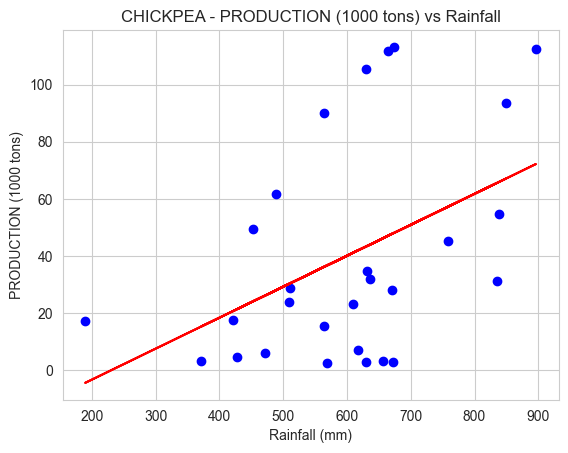

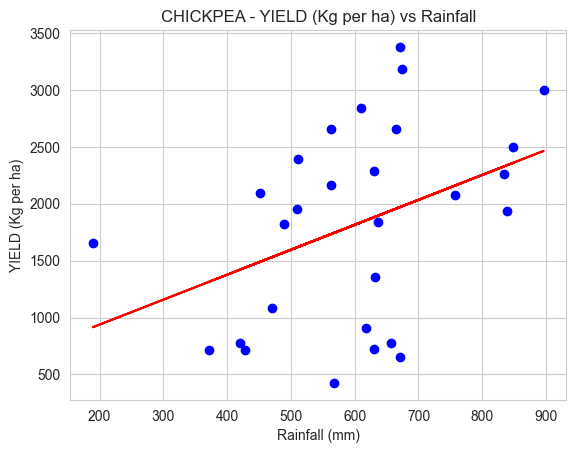

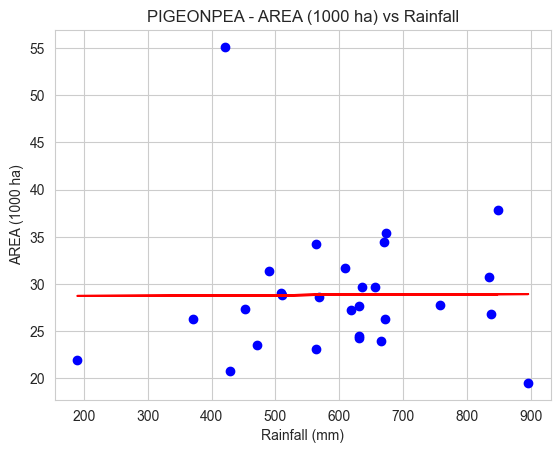

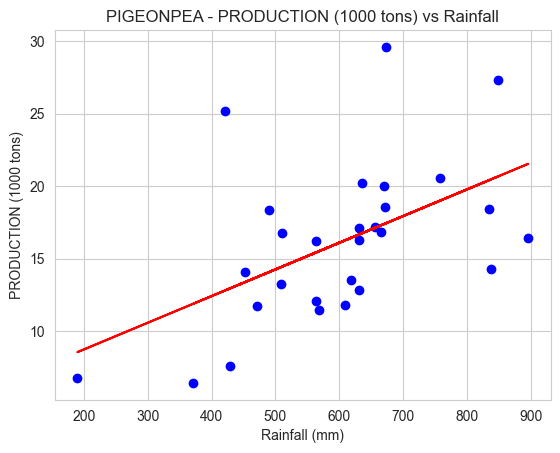

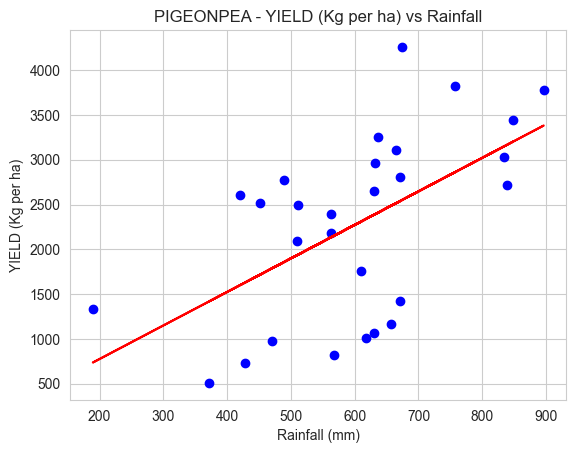

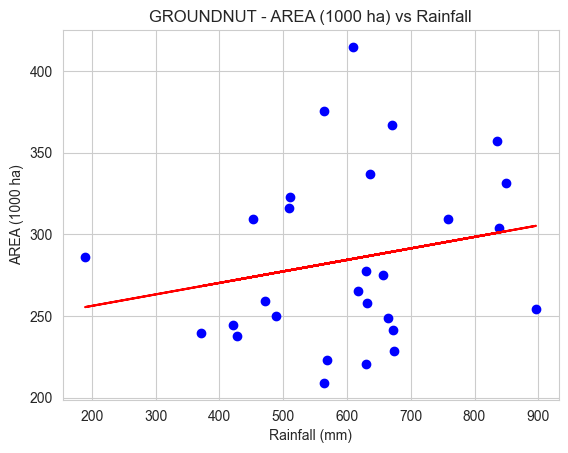

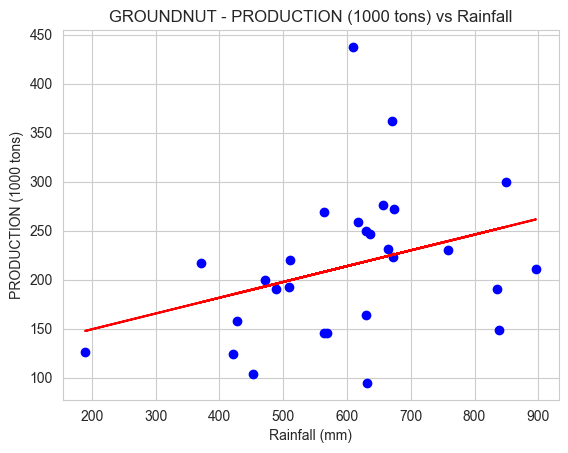

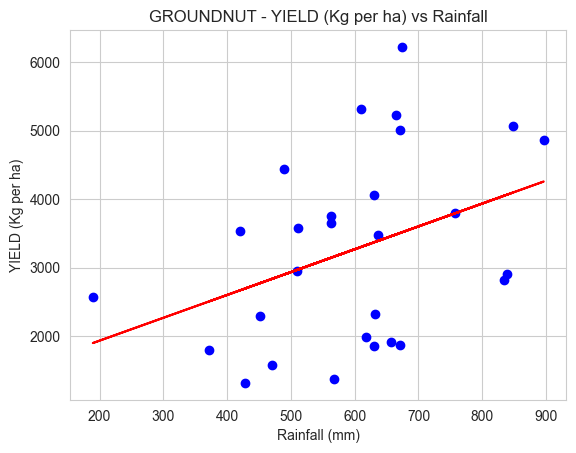

In [37]:
# For each row in the lookup table
for index, row in lookup_table.iterrows():
    # Get crop and variable
    crop = row['Crop']
    variable = row['Variable']

    # Get X and y values
    X = crops_df[['ANNUAL RAINFALL (Millimeters)']]
    y = crops_df[f'{crop} {variable}']

    # Predict y values based on the regression equation
    y_pred = row['Intercept'] + row['Slope'] * X

    # Create a new figure
    plt.figure()

    # Scatter plot of the actual data
    plt.scatter(X, y, color='blue')

    # Line plot of the predicted values
    plt.plot(X, y_pred, color='red')

    # Set title and labels
    plt.title(f'{crop} - {variable} vs Rainfall')
    plt.xlabel('Rainfall (mm)')
    plt.ylabel(variable)

    # Show the plot
    plt.show()

In [38]:
# Filter out rows where Variable is 'YIELD (Kg per ha)'
lookup_table_yield = lookup_table[lookup_table['Variable'] == 'YIELD (Kg per ha)']

lookup_table_yield.head()

,Crop,Variable,Intercept,Slope
2,RICE,YIELD (Kg per ha),6703.193224,7.596720
5,SORGHUM,YIELD (Kg per ha),961.615603,6.220242
8,MAIZE,YIELD (Kg per ha),4440.417415,11.589566
11,FINGER MILLET,YIELD (Kg per ha),1968.109164,4.052355
14,CHICKPEA,YIELD (Kg per ha),499.188117,2.193227


In [39]:
lookup_table_yield.to_pickle('./venv/pickles/lookup_table_yield.pkl')